**Author:** Benoît BAILLIF

**Purpose:** Produce figures for chemical and biological spaces plots

**Input:**
- data/processed/
 - cmp_info_cmap.csv : info on used compounds
 - used_pert_id_target_matrix.csv : find targets for each used compound
 - tsne/ : find t-SNE embeddings for Morgan fingerprints and signatures for used compounds
 
**Output:** 
- plots/Figures 2A to 5D and Supplementary Figure 1 : space plots

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import os
from matplotlib.patches import Ellipse

# Input

In [2]:
processed_data_directory = 'data/processed/'
tsne_directory = processed_data_directory + 'tsne/'

In [3]:
cmp_info_cmap_path = processed_data_directory + 'cmp_info_cmap.csv'
mfp_tsne_path = tsne_directory + 'used_compounds_mfp_tsne.csv'
all_sigs_tsne_path = tsne_directory + 'all_sigs_tsne.csv'
used_pert_id_target_matrix_path = processed_data_directory + 'used_pert_id_target_matrix.csv'

# Output

In [4]:
plots_directory = 'plots/'
if not os.path.exists(plots_directory) :
    os.mkdir(plots_directory)

In [32]:
figure2A_path = plots_directory + 'Figure 2(A).tif'
figure2B_path = plots_directory + 'Figure 2(B).tif'
figure2C_path = plots_directory + 'Figure 2(C).tif'
figure2D_path = plots_directory + 'Figure 2(D).tif'

figure3A_path = plots_directory + 'Figure 3(A).tif'
figure3B_path = plots_directory + 'Figure 3(B).tif'
figure3C_path = plots_directory + 'Figure 3(C).tif'
figure3D_path = plots_directory + 'Figure 3(D).tif'

figure4A_path = plots_directory + 'Figure 4(A).tif'
figure4B_path = plots_directory + 'Figure 4(B).tif'
figure4C_path = plots_directory + 'Figure 4(C).tif'
figure4D_path = plots_directory + 'Figure 4(D).tif'

figure5A_path = plots_directory + 'Figure 5(A).tif'
figure5B_path = plots_directory + 'Figure 5(B).tif'
figure5C_path = plots_directory + 'Figure 5(C).tif'
figure5D_path = plots_directory + 'Figure 5(D).tif'

supplementary_figure_1_path = plots_directory + 'Supplementary Figure 1.tif'

# Main

In [6]:
cell_lines = ['MCF7', 'HA1E', 'HT29', 'A549', 'HCC515', 'PC3', 'VCAP', 'A375']

## Data loading

In [7]:
cmp_info_cmap = pd.read_csv(cmp_info_cmap_path, index_col='pert_id')
print(cmp_info_cmap.shape)
cmp_info_cmap.head()

(21220, 6)


pert_iname  is_touchstone  \
pert_id                                             
BRD-A00100033           nifurtimox            1.0   
BRD-A00150179  5-hydroxytryptophan            0.0   
BRD-A00267231               hemado            1.0   
BRD-A00420644              SA-3676            0.0   
BRD-A00474148        BRD-A00474148            0.0   

                                 inchi_key  \
pert_id                                      
BRD-A00100033  ARFHIAQFJWUCFH-UHFFFAOYSA-N   
BRD-A00150179  QSHLMQDRPXXYEE-UHFFFAOYSA-N   
BRD-A00267231  KOCIMZNSNPOGOP-UHFFFAOYSA-N   
BRD-A00420644  ASCBUEVCEVGOFP-UHFFFAOYSA-N   
BRD-A00474148  RCGAUPRLRFZAMS-UHFFFAOYSA-N   

                                                canonical_smiles  pubchem_cid  \
pert_id                                                                         
BRD-A00100033          CC1CS(=O)(=O)CCN1N=Cc1ccc([N+](=O)[O-])o1    6842999.0   
BRD-A00150179                     NC(Cc1c[nH]c2cccc(O)c12)C(=O)O     589768.0   
BRD-A00267231          CCCCC#Cc1nc(NC)c2ncn(C3OC(CO)C(O)C3O)c2n1    4043357.0   
BRD-A00420644               CCN1c2ccccc2NC2N=C(OC)C(c3ccccc3)C21    2853908.0   
BRD-A00474148  O=C1Cc2cc([S+](=O)([O-])N3CCN(c4ccc(O)cc4)CC3)...   44825297.0   

               used_compound  
pert_id                       
BRD-A00100033              1  
BRD-A00150179              0  
BRD-A00267231              1  
BRD-A00420644              1  
BRD-A00474148              1

In [8]:
used_cmp_info_cmap = cmp_info_cmap[cmp_info_cmap['used_compound'] == True]

In [9]:
mfp_tsne = pd.read_csv(mfp_tsne_path, index_col='pert_id')
print(mfp_tsne.shape)
mfp_tsne.head()

(9035, 2)


Dice_TSNE_1  Dice_TSNE_2
pert_id                                
BRD-A00100033    15.946455    -9.100070
BRD-A00267231    56.683838    63.494427
BRD-A00420644    11.420831    16.421795
BRD-A00474148    -7.454284   -43.675713
BRD-A00520476   -19.509644     6.891182

In [10]:
all_sigs_tsne = pd.read_csv(all_sigs_tsne_path, index_col='pert_id')
print(all_sigs_tsne.shape)
all_sigs_tsne.head()

(39544, 3)


sig_TSNE_1  sig_TSNE_2 cell_line
pert_id                                        
BRD-A00100033  -24.053180   11.011050      MCF7
BRD-A00147595   21.845669   17.578882      MCF7
BRD-A00218260   21.894003   17.436378      MCF7
BRD-A00267231   -1.472206  -12.607553      MCF7
BRD-A00376169    3.886476   49.627666      MCF7

In [11]:
used_pert_id_target_matrix = pd.read_csv(used_pert_id_target_matrix_path, index_col='pert_id')
print(used_pert_id_target_matrix.shape)
used_pert_id_target_matrix.head()

(7825, 1358)


AAK1  ABAT  ABCA1  ABCB1  ABCB11  ABCB6  ABCC1  ABCC2  ABCC3  \
pert_id                                                                       
BRD-A00100033   NaN   NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
BRD-A00218260   NaN   NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
BRD-A00267231   NaN   NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
BRD-A00420644   NaN   NaN    NaN    0.0     NaN    0.0    0.0    NaN    NaN   
BRD-A00474148   NaN   NaN    NaN    NaN     NaN    0.0    NaN    NaN    NaN   

               ABCC5  ...  WEE2  WNT3A  WRN  XDH  XIAP  XPO1  YES1  YWHAB  \
pert_id               ...                                                   
BRD-A00100033    NaN  ...   NaN    NaN  NaN  NaN   NaN   NaN   NaN    NaN   
BRD-A00218260    NaN  ...   NaN    NaN  NaN  NaN   NaN   NaN   NaN    NaN   
BRD-A00267231    NaN  ...   NaN    NaN  NaN  NaN   NaN   NaN   NaN    NaN   
BRD-A00420644    NaN  ...   NaN    NaN  0.0  NaN   NaN   NaN   NaN    NaN   
BRD-A00474148    NaN  ...   NaN    NaN  NaN  NaN   NaN   NaN   NaN    NaN   

               YWHAG  ZAP70  
pert_id                      
BRD-A00100033    NaN    NaN  
BRD-A00218260    NaN    NaN  
BRD-A00267231    NaN    NaN  
BRD-A00420644    0.0    NaN  
BRD-A00474148    NaN    NaN  

[5 rows x 1358 columns]

In [12]:
d_sigs_tsne = {}
for cell_line in cell_lines :
    d_sigs_tsne[cell_line] = pd.read_csv(tsne_directory + cell_line + '_sigs_tsne.csv', index_col='pert_id')

## Plot chemical space with number of target colors

In [13]:
n_target_per_compound = used_pert_id_target_matrix.sum(axis=1)

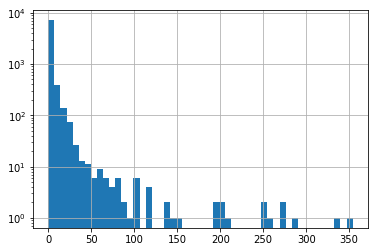

In [14]:
n_target_per_compound.hist(bins=50, log=True)

In [15]:
blues_cmap = matplotlib.cm.get_cmap('Blues')
right_blues_cmap = colors.LinearSegmentedColormap.from_list('Right_blues', blues_cmap(np.linspace(0.2, 1, 100)))

In [16]:
# Since there are some compounds with a large number of target (higher than 100), we decide to truncate to
# 100 hundred for further ploting contrast (for compounds with lower number of targets)
n_target_max_100 = n_target_per_compound.where(n_target_per_compound < 100, 100)

In [17]:
min_one_target = n_target_max_100[n_target_max_100 > 0]

In [18]:
# Compounds without known targets will be ploted in grey, they need to be separated from the cmap
tsne_no_target = mfp_tsne[~(mfp_tsne.index.isin(min_one_target.index))]

tsne_target = mfp_tsne[mfp_tsne.index.isin(min_one_target.index)]
min_one_target.name = 'n_targets'
tsne_target = tsne_target.join(min_one_target)
tsne_target = tsne_target.sort_values('n_targets')

In [19]:
max_target = 100
# Set colors using cmap that maps only between 0 and 1
target_colors = right_blues_cmap(tsne_target['n_targets'].values / max_target)

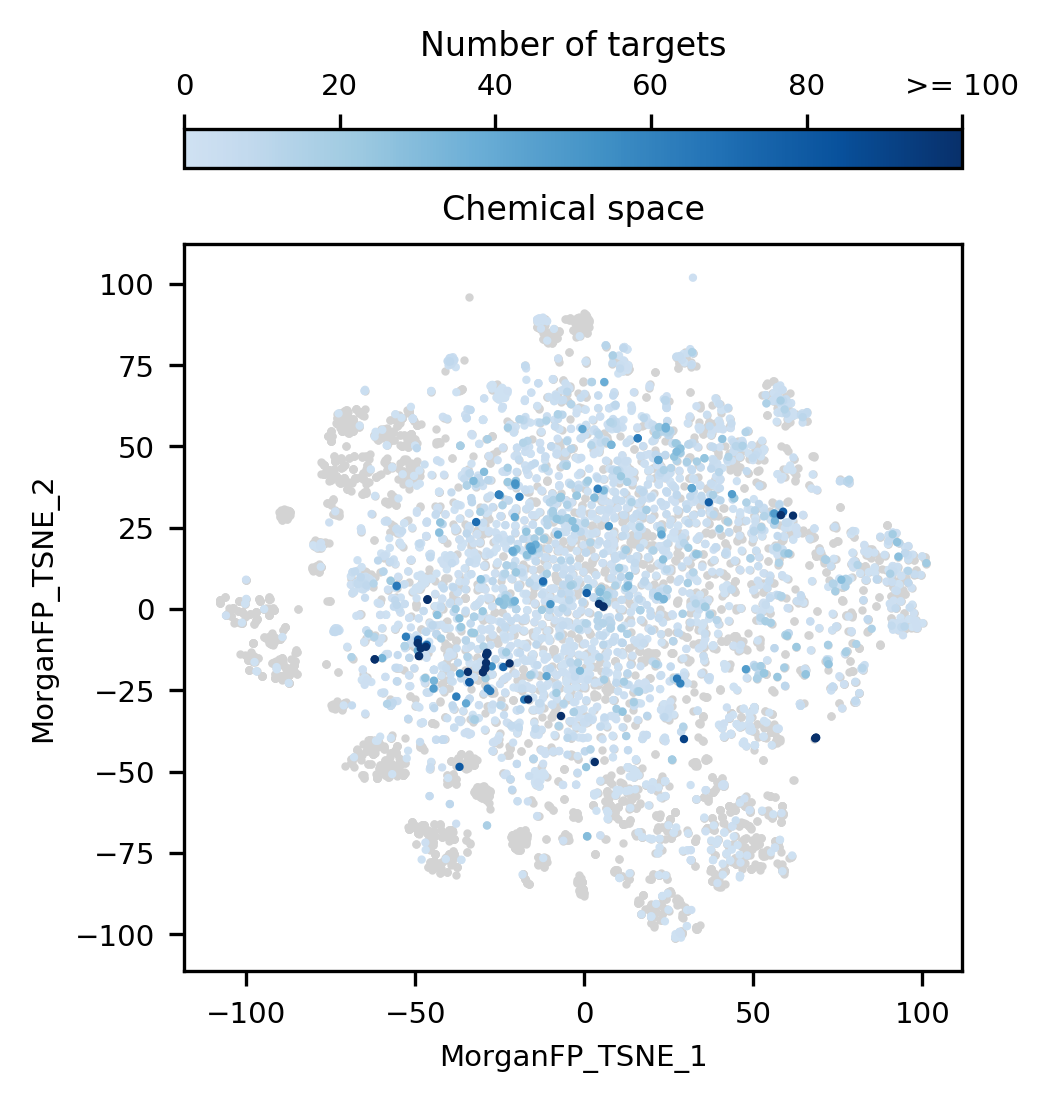

In [20]:
# Create Figure 2(A) of the paper, corresponding to t-SNE chemical space, having color gradient depending
# on compound known target
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8.5/2.54,9.44/2.54), dpi=300, gridspec_kw={'height_ratios': [1, 19]})

# Colorbar setup

cb1 = matplotlib.colorbar.ColorbarBase(ax1, 
                                       cmap=right_blues_cmap,
                                       norm=matplotlib.colors.Normalize(vmin=0, vmax=100), 
                                       orientation='horizontal')

# Get the last colorbar tick to be ">= 100" since we defined our max target to 100 earlier
ts = cb1.get_ticks()
nts = []
for v in ts :
    nts.append(str(int(v)))
nts[-1] = '>= 100'

cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=7) 
cb1.ax.xaxis.set_label_position('top')
cb1.ax.set_xticklabels(nts)
cb1.set_label('Number of targets', fontsize=8)

# Scatterplot setup
ax2.scatter(tsne_no_target['Dice_TSNE_1'], tsne_no_target['Dice_TSNE_2'], c='lightgrey', s=1, label='')
ax2.scatter(tsne_target['Dice_TSNE_1'], tsne_target['Dice_TSNE_2'], c=target_colors, s=1, label='')
ax2.set_title('Chemical space', fontsize=8)
ax2.set_xlabel('MorganFP_TSNE_1', fontsize=7)
ax2.set_ylabel('MorganFP_TSNE_2', fontsize=7)
ax2.tick_params(axis='both', labelsize=7)

plt.savefig(figure2A_path, bbox_inches='tight', #pil_kwargs={'compression' : 'LZW'}
           )

## Plot global biological space

In [21]:
DOT_SIZE=0.2
cell_line_color_map = {
    'MCF7' : 'darkorange',
    'VCAP' : 'brown',
    'PC3' : 'paleturquoise',
    'HCC515' : 'gold',
    'HA1E' : 'red',
    'A375' : 'blue',
    'A549' : 'green',
    'HT29' : 'purple'
}

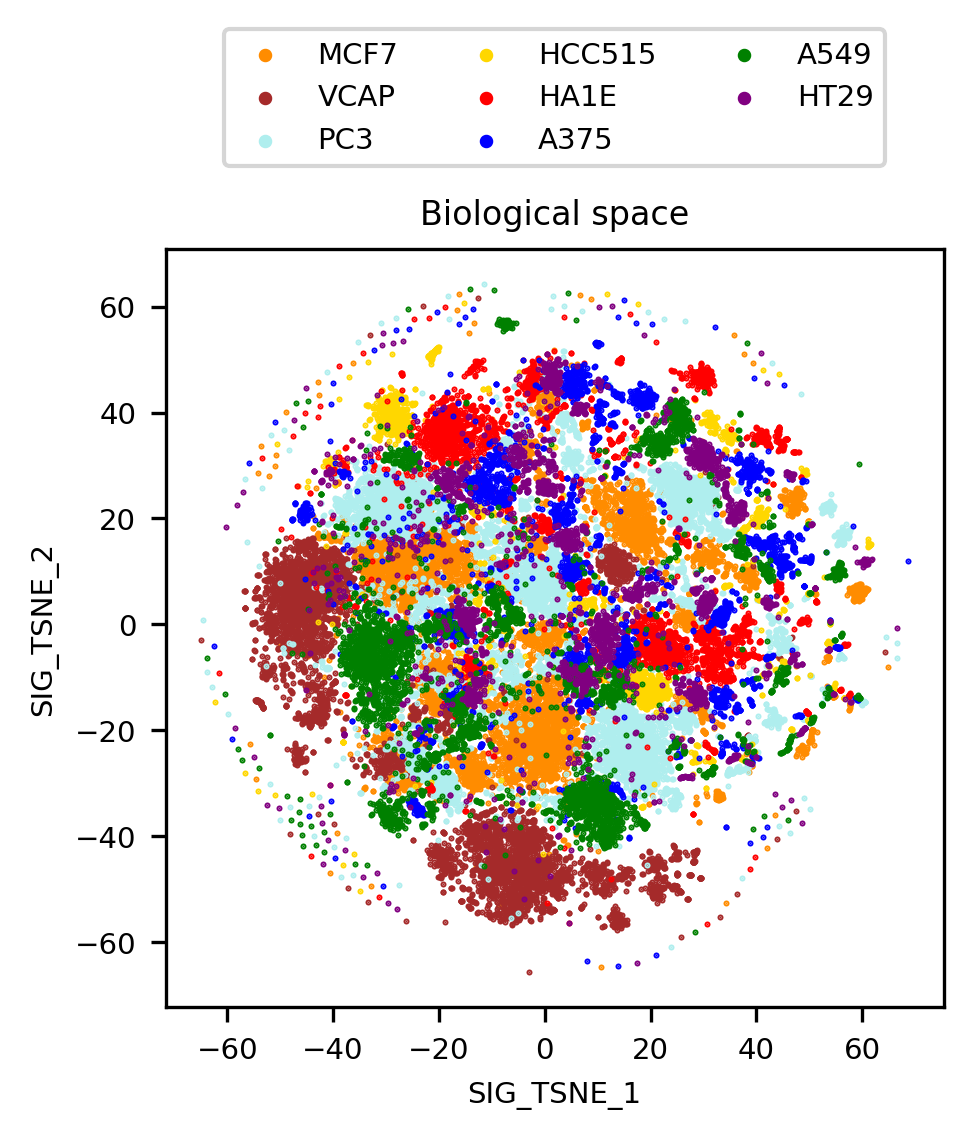

In [22]:
# Figure 2(B) : general biological space
fig = plt.figure(figsize=(8.5/2.54,8.5/2.54), dpi=300)
ax = fig.add_subplot(1, 1, 1)

i = 0
for cell_line in ['MCF7', 'VCAP', 'PC3', 'HCC515', 'HA1E', 'A375', 'A549', 'HT29'] :
    color = cell_line_color_map[cell_line]
    cell_line_tsne = all_sigs_tsne[all_sigs_tsne['cell_line'] == cell_line]
    ax.scatter(cell_line_tsne['sig_TSNE_1'], cell_line_tsne['sig_TSNE_2'], c=color, s=DOT_SIZE, label=cell_line)
    i = i + 1
    
lgnd = plt.legend(fontsize=7, ncol=3, loc='center', bbox_to_anchor=(0.5, 1.2))
for handle in lgnd.legendHandles:
    handle.set_sizes([5.0])
    
plt.title('Biological space', fontsize=8)
plt.xlabel('SIG_TSNE_1', fontsize=7)
plt.ylabel('SIG_TSNE_2', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
plt.savefig(figure2B_path, bbox_inches='tight')

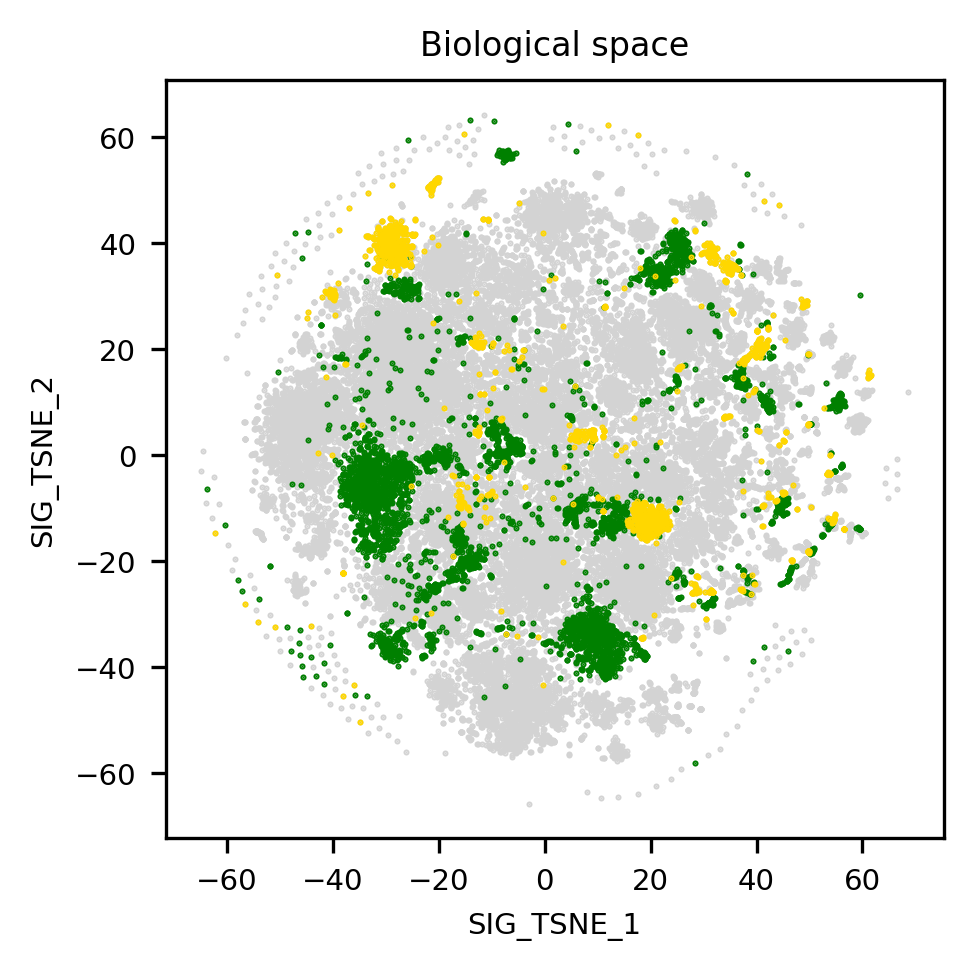

In [23]:
# Figure 2C : Global biological space with only lung cancer cell lines colored
fig = plt.figure(figsize=(8.5/2.54,8.5/2.54), dpi=300)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(all_sigs_tsne['sig_TSNE_1'], all_sigs_tsne['sig_TSNE_2'], c='lightgrey', s=DOT_SIZE)
for cell_line in ['A549', 'HCC515'] :
    color = cell_line_color_map[cell_line]
    cell_line_tsne = all_sigs_tsne[all_sigs_tsne['cell_line'] == cell_line]
    ax.scatter(cell_line_tsne['sig_TSNE_1'], cell_line_tsne['sig_TSNE_2'], c=color, s=DOT_SIZE)
    
plt.title('Biological space', fontsize=8)
plt.xlabel('SIG_TSNE_1', fontsize=7)
plt.ylabel('SIG_TSNE_2', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
plt.savefig(figure2C_path, bbox_inches='tight')

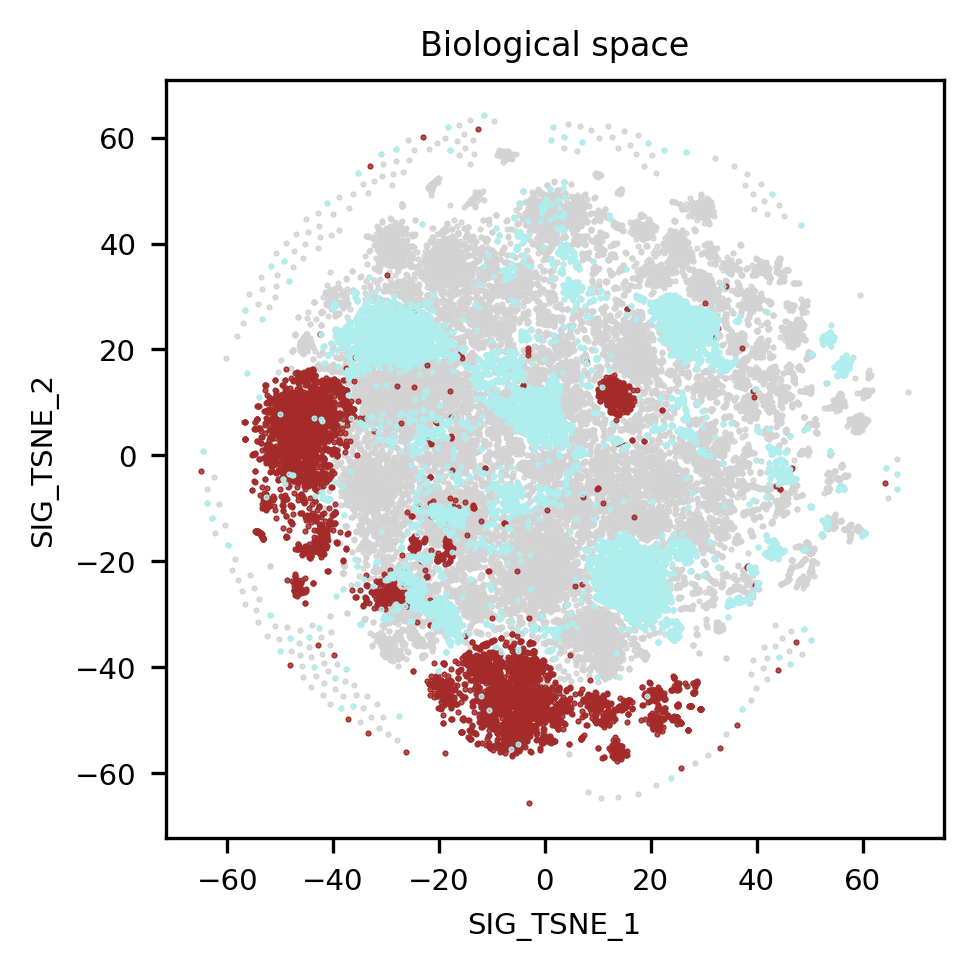

In [24]:
# Figure 2D : Global biological space with only prostate cancer cell lines colored
fig = plt.figure(figsize=(8.5/2.54,8.5/2.54), dpi=300)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(all_sigs_tsne['sig_TSNE_1'], all_sigs_tsne['sig_TSNE_2'], c='lightgrey', s=DOT_SIZE)
for cell_line in ['VCAP', 'PC3'] :
    color = cell_line_color_map[cell_line]
    cell_line_tsne = all_sigs_tsne[all_sigs_tsne['cell_line'] == cell_line]
    ax.scatter(cell_line_tsne['sig_TSNE_1'], cell_line_tsne['sig_TSNE_2'], c=color, s=DOT_SIZE)
    
plt.title('Biological space', fontsize=8)
plt.xlabel('SIG_TSNE_1', fontsize=7)
plt.ylabel('SIG_TSNE_2', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
plt.savefig(figure2D_path, bbox_inches='tight')

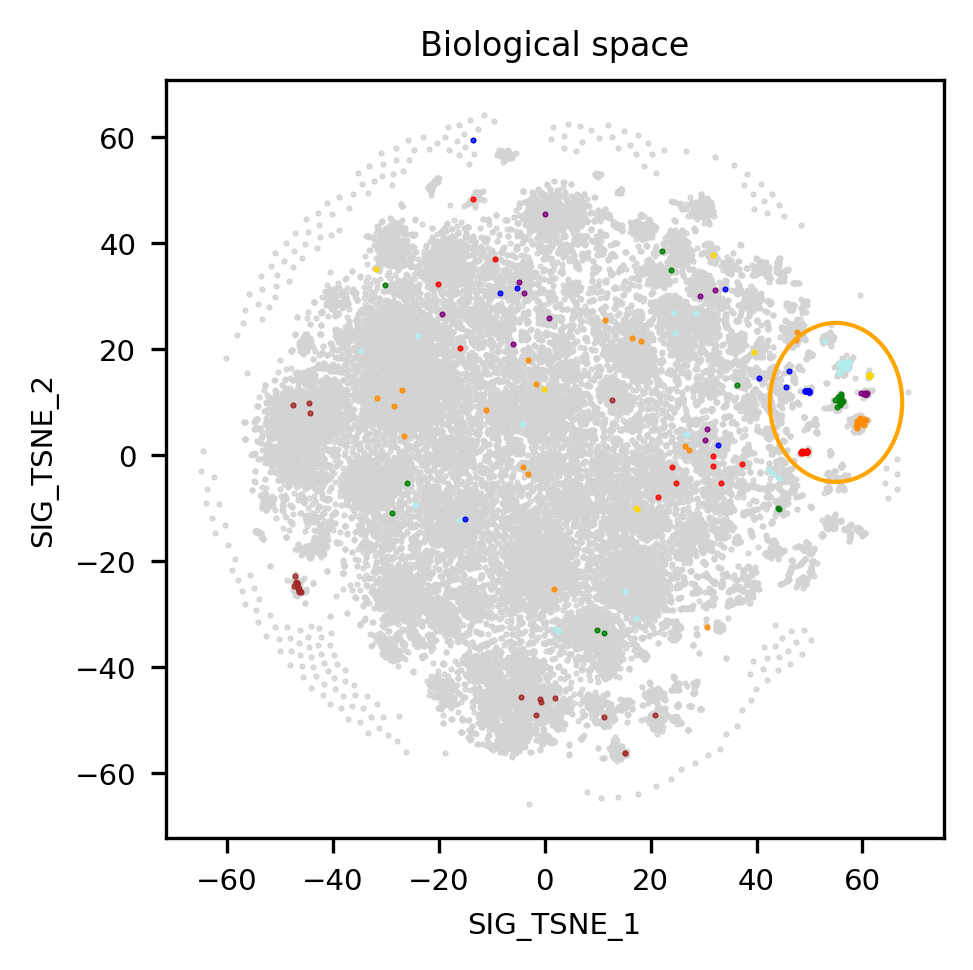

In [25]:
# Supplementary Figure 1 : Global biological space with TUBB active colored

tubb_actives = used_pert_id_target_matrix[used_pert_id_target_matrix['TUBB'] == 1].index

fig = plt.figure(figsize=(8.5/2.54,8.5/2.54), dpi=300)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(all_sigs_tsne['sig_TSNE_1'], all_sigs_tsne['sig_TSNE_2'], c='lightgrey', s=DOT_SIZE)

tubb_tsne = all_sigs_tsne[all_sigs_tsne.index.isin(tubb_actives)]
for cell_line in ['MCF7', 'VCAP', 'PC3', 'HCC515', 'HA1E', 'A375', 'A549', 'HT29'] :
    color = cell_line_color_map[cell_line]
    cell_line_tsne = tubb_tsne[tubb_tsne['cell_line'] == cell_line]
    ax.scatter(cell_line_tsne['sig_TSNE_1'], cell_line_tsne['sig_TSNE_2'], c=color, s=DOT_SIZE)
    
ax.add_patch(Ellipse((55, 10), width=25, height=30, fill=False, edgecolor='orange'))
    
plt.title('Biological space', fontsize=8)
plt.xlabel('SIG_TSNE_1', fontsize=7)
plt.ylabel('SIG_TSNE_2', fontsize=7)
plt.tick_params(axis='both', labelsize=7)
plt.savefig(supplementary_figure_1_path, bbox_inches='tight')

## Plot chemical and biological spaces for NR3C1, TUBB and DRD2 in MCF7, PC3 and A549 cell lines

In [26]:
DOT_SIZE = 1

In [27]:
d_fig_names = {
    'NR3C1' : {
        'CHEM' : figure3A_path,
        'MCF7' : figure3B_path,
        'PC3' : figure3C_path,
        'A549' : figure3D_path
    },
    'TUBB' : {
        'CHEM' : figure4A_path,
        'MCF7' : figure4B_path,
        'PC3' : figure4C_path,
        'A549' : figure4D_path
    },
    'DRD1' : {
        'CHEM' : figure5A_path,
        'MCF7' : figure5B_path,
        'PC3' : figure5C_path,
        'A549' : figure5D_path
    }
}

In [28]:
def plot_chemical_space(ax, target, tsne, tsne_actives, tsne_inactives) :
    
    ax.scatter(tsne['Dice_TSNE_1'], tsne['Dice_TSNE_2'], c='lightgrey', s=DOT_SIZE, label='')
    ax.scatter(tsne_inactives['Dice_TSNE_1'], tsne_inactives['Dice_TSNE_2'], c='dodgerblue', s=DOT_SIZE, label=target +' inactives')
    ax.scatter(tsne_actives['Dice_TSNE_1'], tsne_actives['Dice_TSNE_2'], c='tomato', s=DOT_SIZE, label=target +' actives')
    
    plt.title('Chemical space', fontsize=8)
    plt.xlabel('MorganFP_TSNE_1', fontsize=7)
    plt.ylabel('MorganFP_TSNE_2', fontsize=7)
    plt.tick_params(axis='both', labelsize=7)
    
    

In [29]:
def plot_biological_space(ax, target, cell_line, tsne, tsne_actives, tsne_inactives) :
    
    tsne_col_1 = 'Cosine_' + cell_line + '_sigs_TSNE_1'
    tsne_col_2 = 'Cosine_' + cell_line + '_sigs_TSNE_2'
    ax.scatter(tsne[tsne_col_1], tsne[tsne_col_2], c='lightgrey', s=DOT_SIZE, label='')
    ax.scatter(tsne_inactives[tsne_col_1], tsne_inactives[tsne_col_2], c='dodgerblue', s=DOT_SIZE, label=target +' inactives')
    ax.scatter(tsne_actives[tsne_col_1], tsne_actives[tsne_col_2], c='tomato', s=DOT_SIZE, label=target +' actives')
    
    plt.title(cell_line + ' biological space', fontsize=8)
    plt.xlabel(cell_line + '_TSNE_1', fontsize=7)
    plt.ylabel(cell_line + '_TSNE_2', fontsize=7)
    plt.tick_params(axis='both', labelsize=7)

In [30]:
def plot_space_with_activity_label(target, tsne, actives, inactives, ellipse=None) :
    
    tsne_actives = tsne[tsne.index.isin(actives)]
    tsne_inactives = tsne[tsne.index.isin(inactives)]
        
    if 'Dice_TSNE_1' in tsne.columns :
        space = 'CHEM'
    else :
        space = tsne.columns[0].split('_')[1]
        
    fig = plt.figure(figsize=(8.5/2.54,8.5/2.54), dpi=300)
    ax = fig.add_subplot(1, 1, 1)
    if space == 'CHEM' :
        plot_chemical_space(ax, target, tsne, tsne_actives, tsne_inactives)
    else :
        plot_biological_space(ax, target, space, tsne, tsne_actives, tsne_inactives)

    lgnd = plt.legend(bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), fontsize=5)
    for handle in lgnd.legendHandles:
        handle.set_sizes([1.0])
    
    if ellipse != None :
        ellipse = d_ellipse[target][space]
        ax.add_patch(ellipse)
    
    figname = d_fig_names[target][space]
    plt.savefig(figname, bbox_inches='tight') 

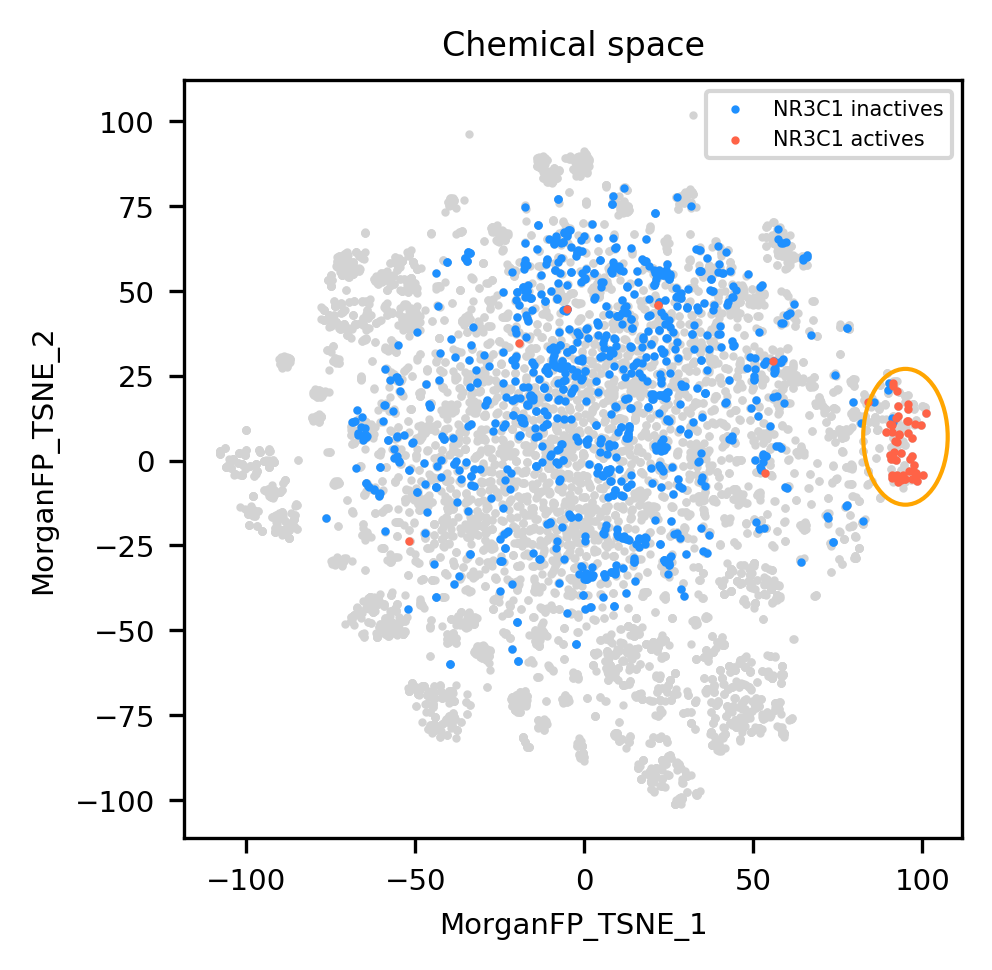

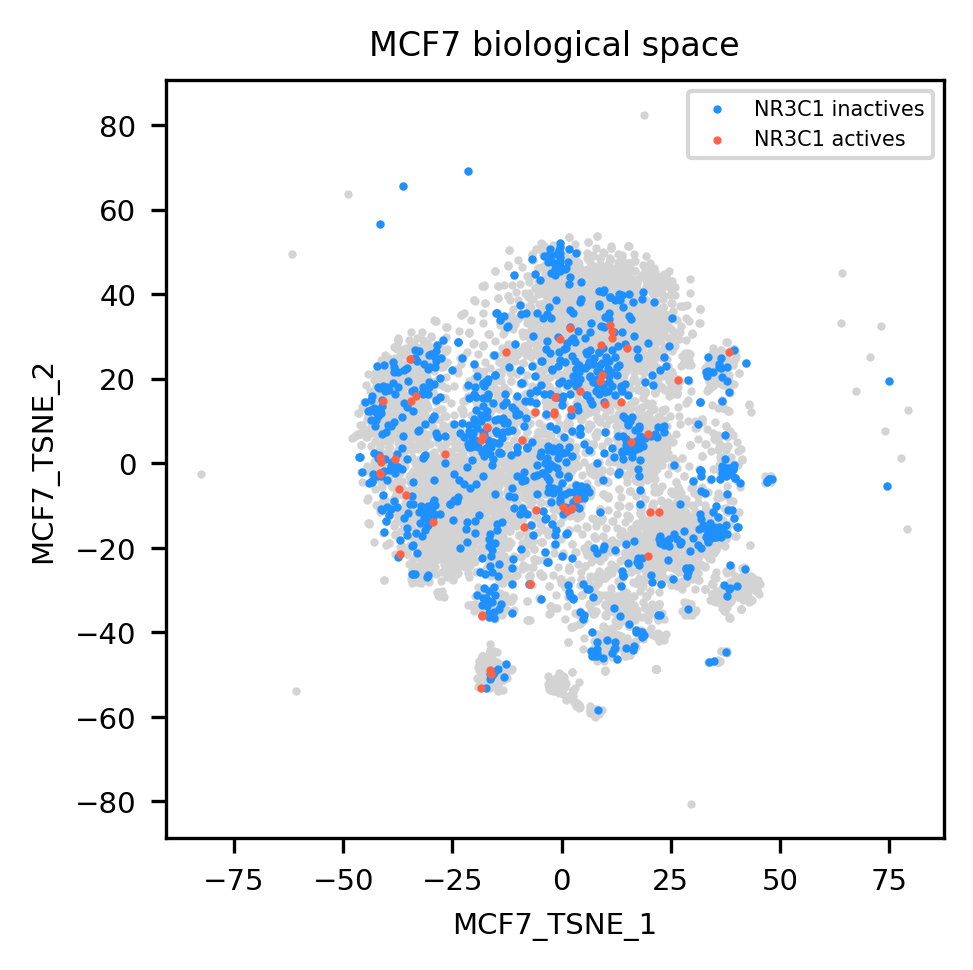

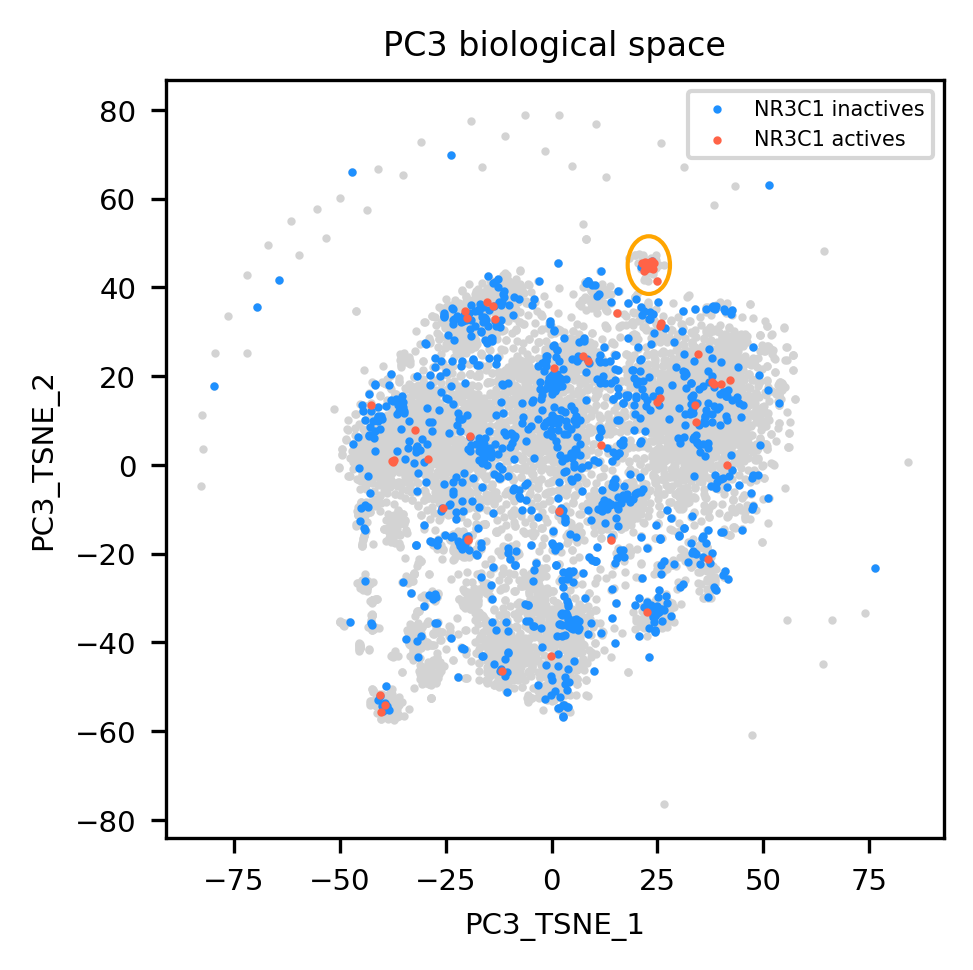

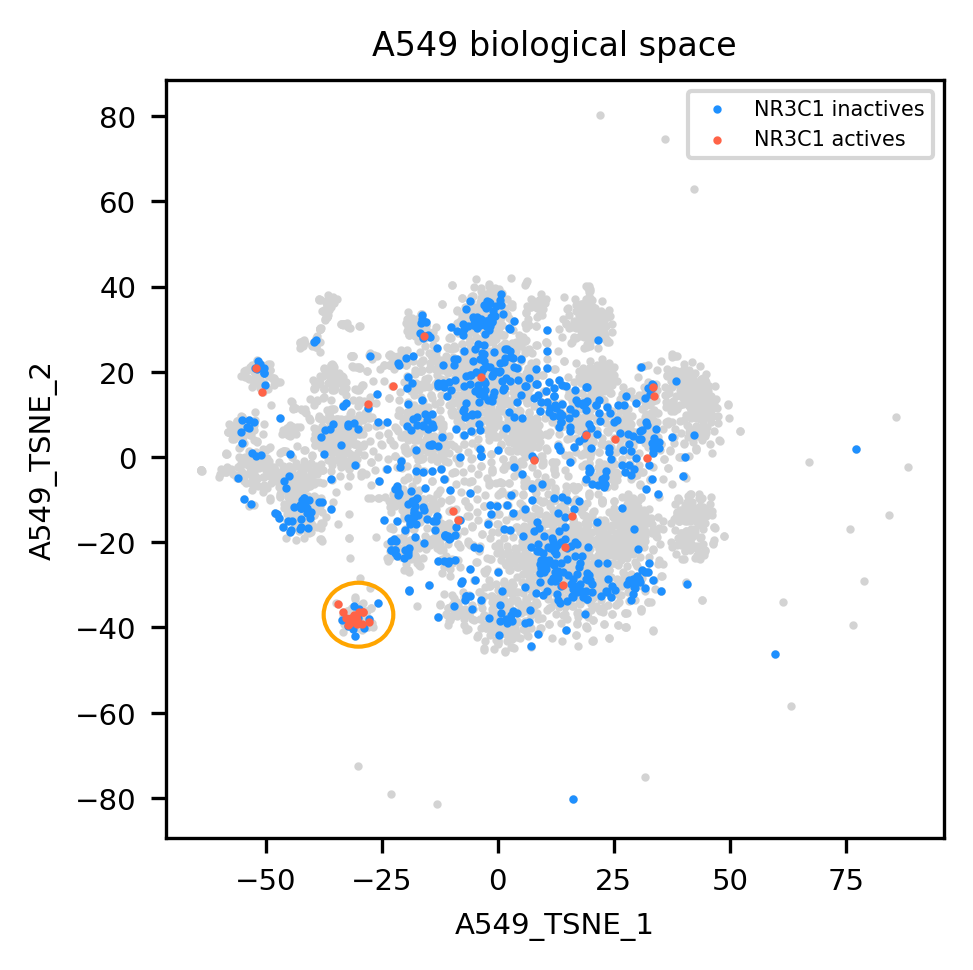

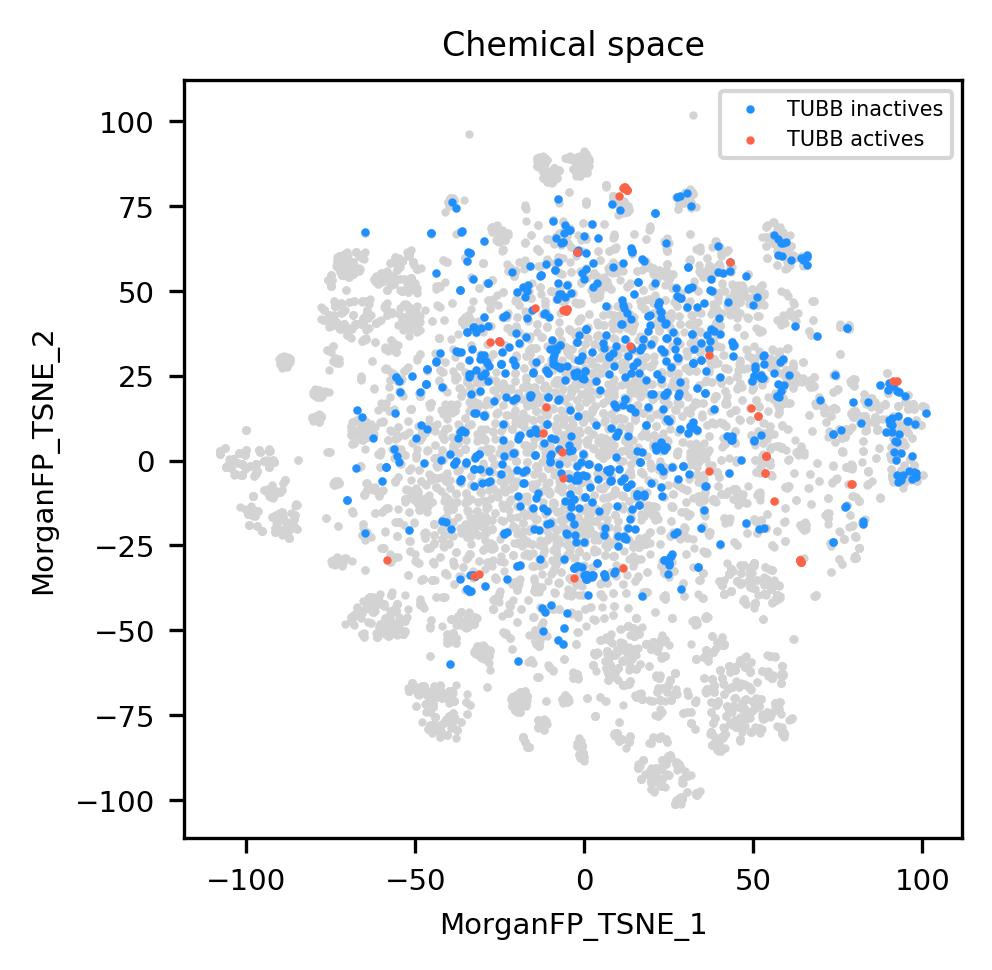

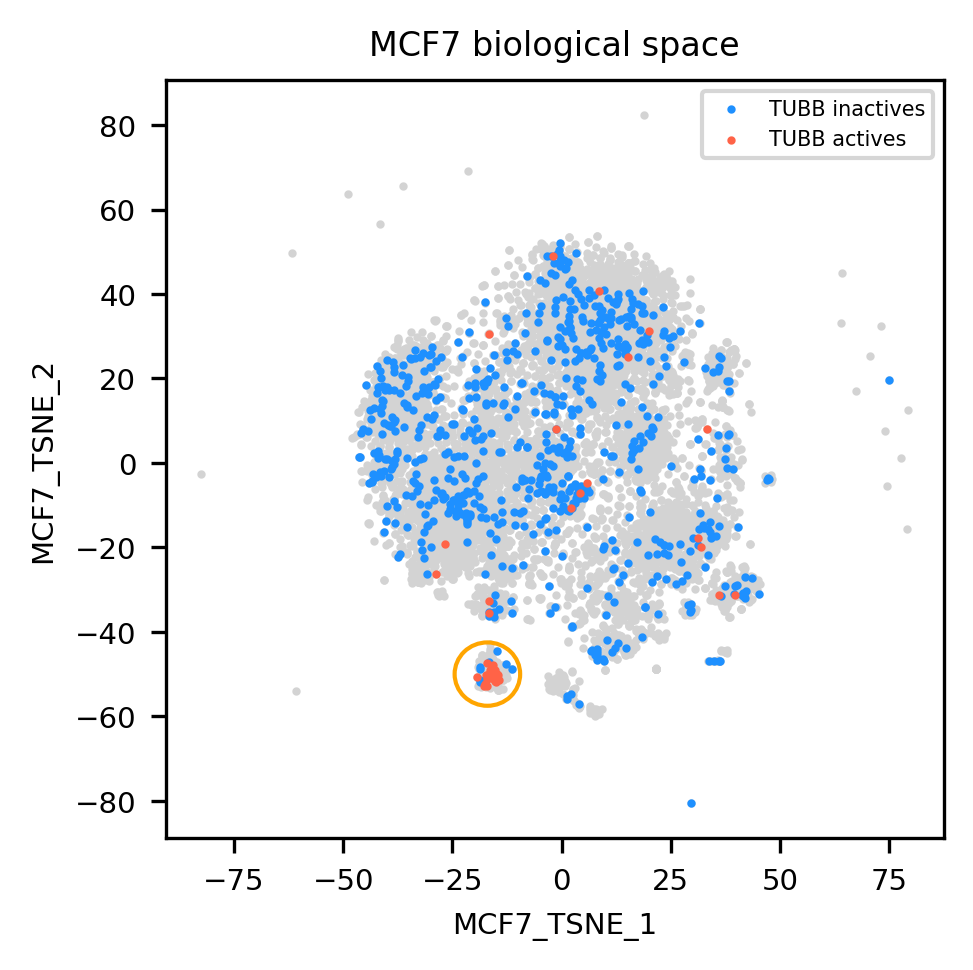

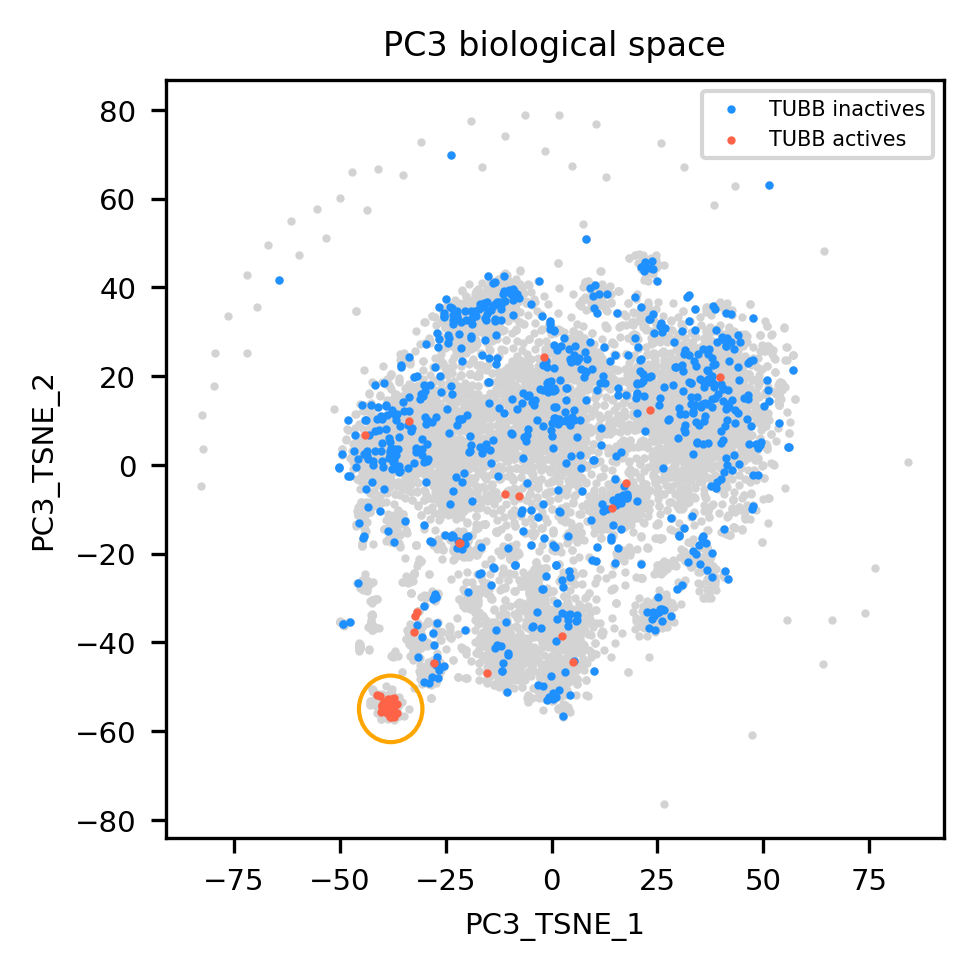

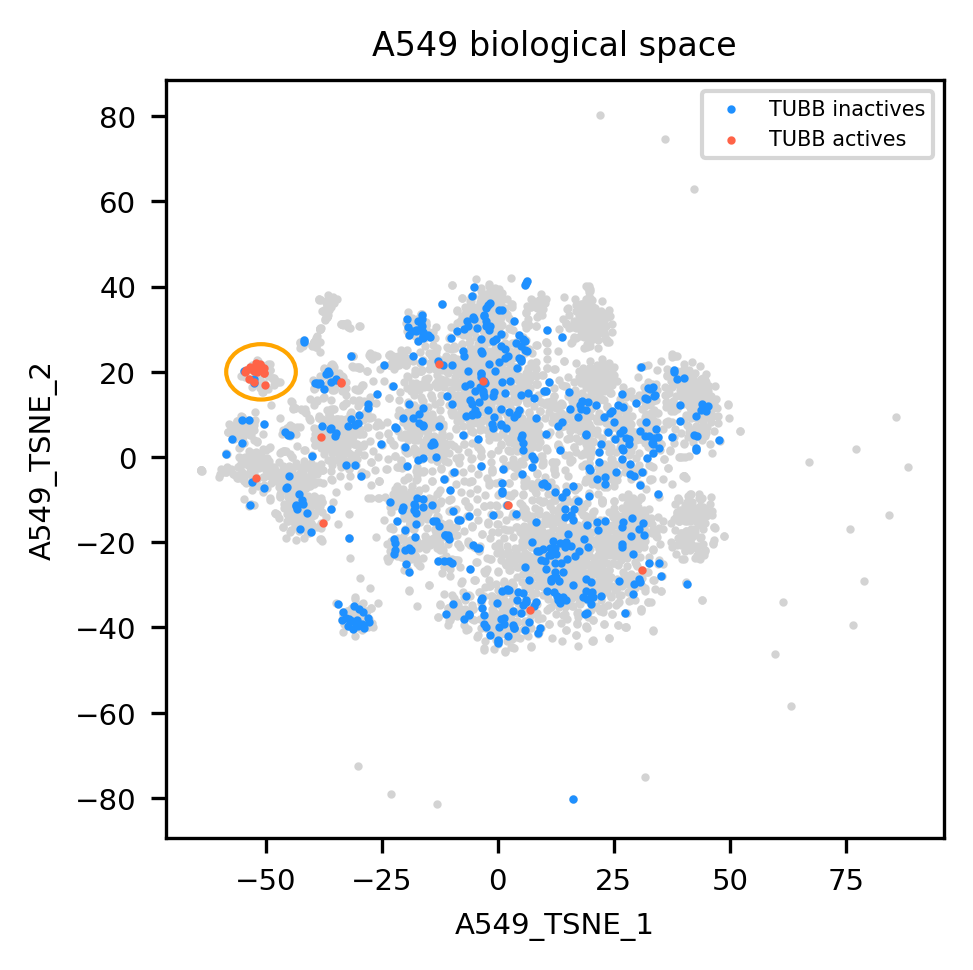

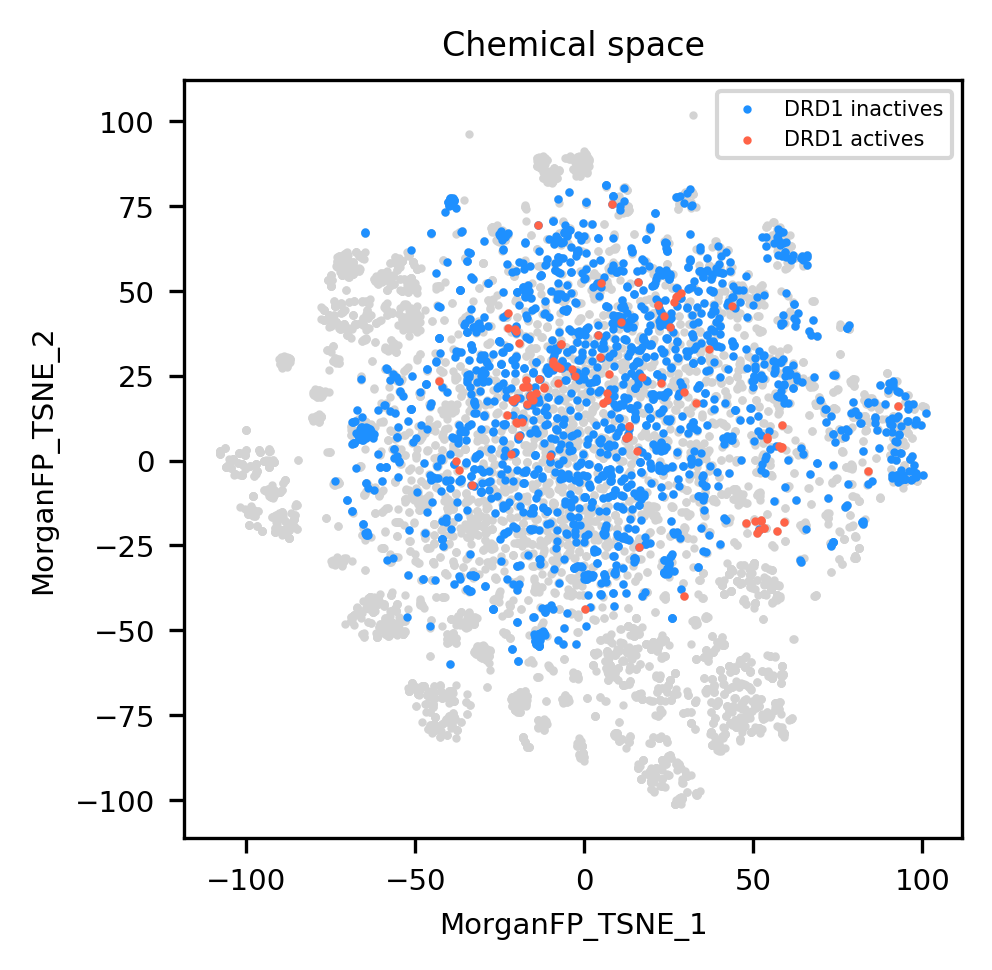

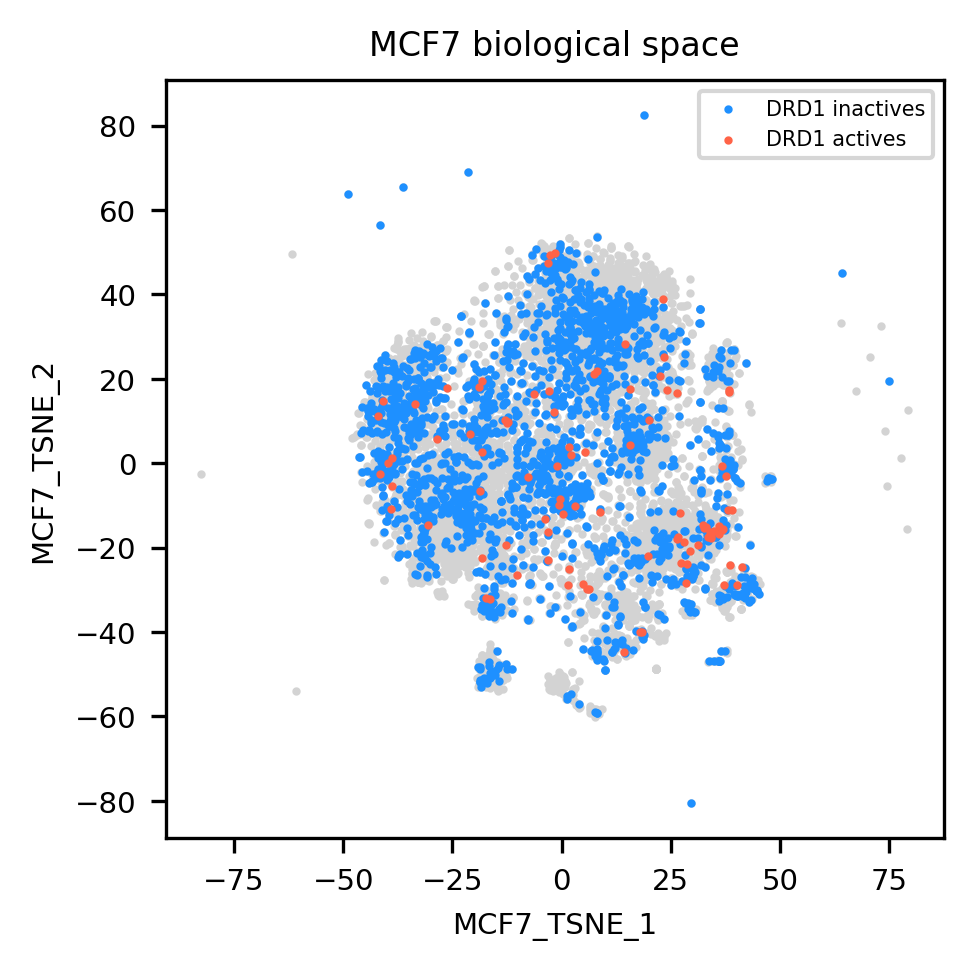

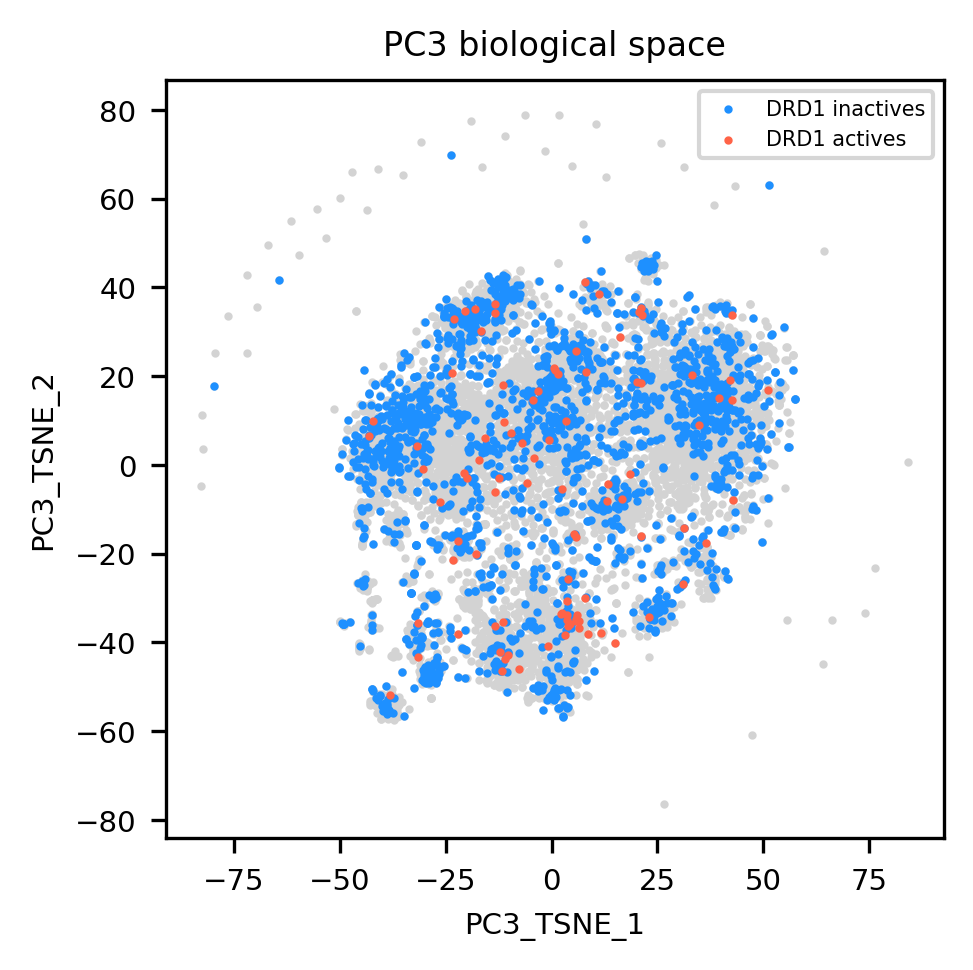

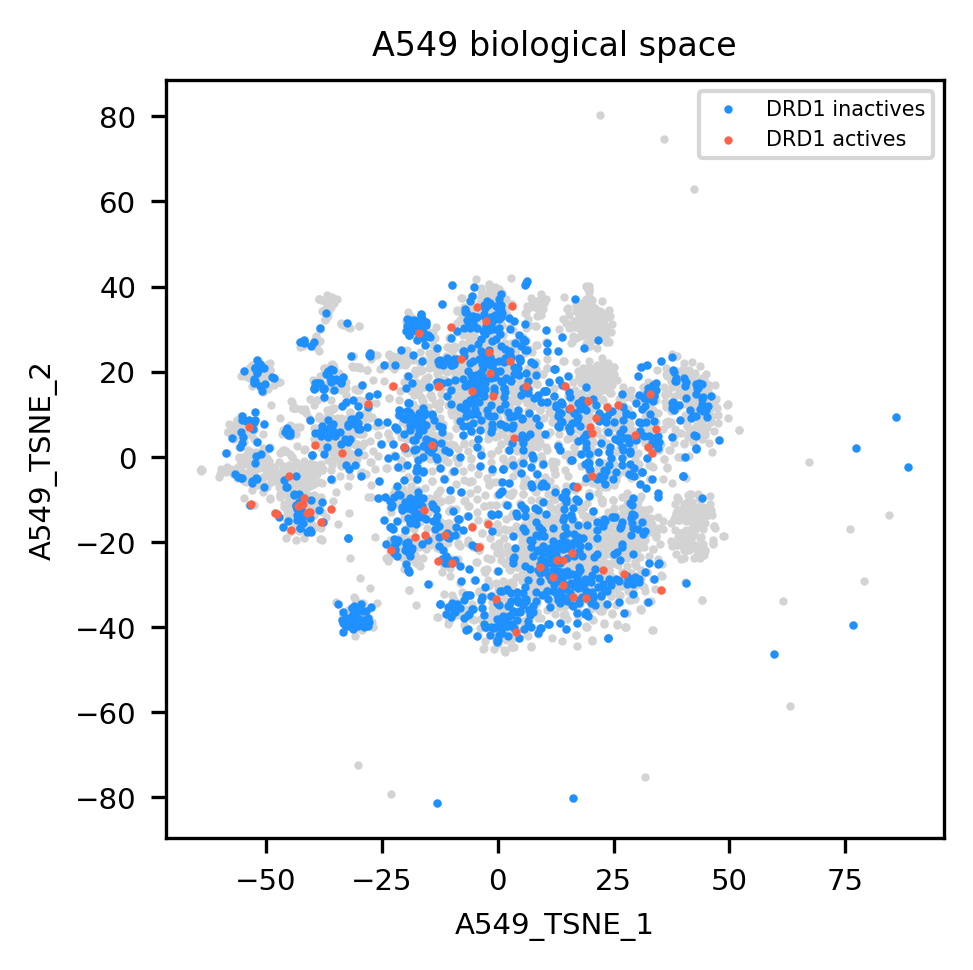

In [31]:
d_ellipse = {
    'NR3C1' : {
        'CHEM' : Ellipse((95, 7), width=25, height=40, fill=False, edgecolor='orange'),
        'PC3' : Ellipse((23, 45), width=10, height=13, fill=False, edgecolor='orange'),
        'A549' : Ellipse((-30, -37), width=15, height=15, fill=False, edgecolor='orange')
    },
    'TUBB' : {
        'MCF7' : Ellipse((-17, -50), width=15, height=15, fill=False, edgecolor='orange'),
        'PC3' : Ellipse((-38, -55), width=15, height=15, fill=False, edgecolor='orange'),
        'A549' : Ellipse((-51, 20), width=15, height=13, fill=False, edgecolor='orange')
    }
}

for target in ['NR3C1', 'TUBB', 'DRD1'] :
    
    actives_on_target = used_pert_id_target_matrix[used_pert_id_target_matrix[target] == 1].index
    inactives_on_target = used_pert_id_target_matrix[used_pert_id_target_matrix[target] == 0].index
    
    ellipse = None
    if target in d_ellipse :
        if 'CHEM' in d_ellipse[target] :
            ellipse = d_ellipse[target]['CHEM']
            
    plot_space_with_activity_label(target, mfp_tsne, actives_on_target, inactives_on_target, ellipse)
    
    for cell_line in ['MCF7', 'PC3', 'A549'] :
        sigs_tsne = d_sigs_tsne[cell_line]
        
        ellipse = None
        if target in d_ellipse :
            if cell_line in d_ellipse[target] :
                ellipse = d_ellipse[target][cell_line]
                
        plot_space_with_activity_label(target, sigs_tsne, actives_on_target, inactives_on_target, ellipse)